In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Load the data into a Pandas DataFrame
data = pd.read_csv('/content/Tweets.csv')

In [ ]:
# Check if there are any missing values
if data.isnull().values.any():
    data.dropna(inplace=True)

In [ ]:
# Define preprocessing functions
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:

def clean_text(text):
    # remove unwanted characters and symbols
    text = re.sub(r'[^\w\s]', '', text)
    return text

def lowercase_text(text):
    # convert text to lowercase
    text = text.lower()
    return text

def remove_stopwords(text):
    # remove stopwords
    tokens = text.split()
    filtered_tokens = [token for token in tokens if token not in stop_words]
    text = ' '.join(filtered_tokens)
    return text

def stem_text(text):
    # apply stemming
    tokens = text.split()
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    text = ' '.join(stemmed_tokens)
    return text

def preprocess_text(text):
    text = str(text)
    text = clean_text(text)
    text = lowercase_text(text)
    text = remove_stopwords(text)
    text = stem_text(text)
    return text

In [ ]:
data['text'] = data['selected_text'].apply(preprocess_text)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['sentiment'], test_size=0.2, random_state=42)

In [ ]:
# Convert the text data into numerical features using CountVectorizer
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train.astype(str))
X_test_counts = vectorizer.transform(X_test.astype(str))

In [ ]:
# Train the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_counts, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Evaluate the performance of the classifier on the testing set
y_pred = clf.predict(X_test_counts)
accuracy = accuracy_score(y_test, y_pred)*100
# precision = precision_score(y_test, y_pred, average='weighted')
# recall = recall_score(y_test, y_pred, average='weighted')
# f1 = f1_score(y_test, y_pred, average='weighted')
print(f'Test accuracy: {accuracy}%')
# print(f'Test precision: {precision}')
# print(f'Test recall: {recall}')
# print(f'Test F1 score: {f1}')

Test accuracy: 77.25618631732168%


In [ ]:
import matplotlib.pyplot as plt

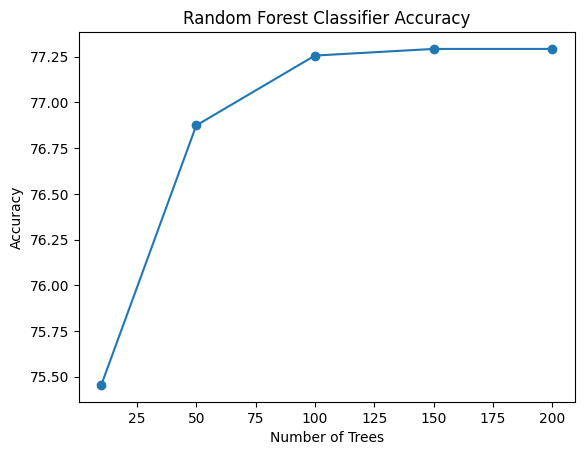

In [ ]:
num_trees = [10, 50, 100, 150, 200]
accuracies = []
for n in num_trees:
    clf = RandomForestClassifier(n_estimators=n, random_state=42)
    clf.fit(X_train_counts, y_train)
    y_pred = clf.predict(X_test_counts)
    accuracy = accuracy_score(y_test, y_pred) * 100
    accuracies.append(accuracy)

# Plot the accuracy vs number of trees
plt.plot(num_trees, accuracies, '-o')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.title('Random Forest Classifier Accuracy')
plt.show()